In [1]:
import pandas as pd
import torch
from torch.nn.functional import mse_loss, relu
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import wilcoxon
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
colunas_av = ['user_id', 'filme_id', 'rating', 'timestamp']
avaliacao = pd.read_csv('./movielens/u.data', sep='\t', names=colunas_av)
avaliacao.head(20)

,user_id,filme_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [3]:
user = pd.read_csv('./movielens/u.user', sep='|', header = None)
colunas_user = ['user_id', 'idade', 'sexo', 'profissao', 'cep']
user.columns = colunas_user
user.drop(columns = ['cep'], inplace = True)
user.head()

,user_id,idade,sexo,profissao
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [5]:
filmes = pd.read_csv('./movielens/u.item', sep='|', encoding='ISO-8859-1', header = None)
colunas_filme = ['filme_id', 'nome_filme','lancamento' ,'3', 'url_filme', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
filmes.columns = colunas_filme
filmes.drop (columns = ['3', 'url_filme'], inplace = True)
filmes.head(20)

,filme_id,nome_filme,lancamento,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
avaliacao.drop(columns= 'timestamp', inplace=True)
avaliacao.head()
df = avaliacao.pivot(index='user_id', columns = 'filme_id', values='rating')

df.fillna(df.mean(), inplace=True)
df.head(100)

filme_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.000000,3.000000,4.000000,3.000000,3.000000,5.000000,4.000000,1.000000,5.000000,3.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
2,4.000000,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,2.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
3,3.878319,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,3.831461,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
4,3.878319,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,3.831461,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
5,4.000000,3.000000,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,3.831461,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,5.000000,3.206107,3.033333,3.550239,3.302326,3.576923,5.000000,5.000000,3.896321,3.831461,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
97,4.000000,3.206107,3.033333,3.550239,3.302326,3.576923,5.000000,3.995434,3.896321,3.831461,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
98,3.878319,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,3.831461,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0


In [7]:
df_np = df.to_numpy()

# Dividindo o conjunto de dados em treino, validação e teste (70% treino, 15% validação, 15% teste)
train_data, test_data = train_test_split(df_np, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

# Convertendo os dados em tensores do PyTorch
train_tensor = torch.tensor(train_data, dtype=torch.float32)
val_tensor = torch.tensor(val_data, dtype=torch.float32)
test_tensor = torch.tensor(test_data, dtype=torch.float32)


# *NMF*

In [36]:
class NMFModel:
    def __init__(self, num_epochs, n_components, learning_rate):
        self.num_epochs = num_epochs
        self.n_components = n_components
        self.learning_rate = learning_rate
        self.best_W = None
        self.best_H = None
    
    def fit(self, train, val):
        self.W = torch.rand((train.shape[0], self.n_components), dtype=torch.float32, requires_grad=True)
        self.H = torch.rand((self.n_components, train.shape[1]), dtype=torch.float32, requires_grad=True)
        
        self.best_val_loss = float('inf')
        
        optimizer = torch.optim.SGD([self.W, self.H], self.learning_rate)
        
        for epoch in tqdm(range(self.num_epochs), "Epoca NMF: "):
            R_pred = torch.relu(torch.mm(self.W, self.H))
            R_pred_train = R_pred[:train.shape[0], :train.shape[1]]
            R_pred_val = R_pred[:val.shape[0], :val.shape[1]]

            train_loss = mse_loss(R_pred_train, train)
            val_loss = mse_loss(R_pred_val, val)

            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.best_W = self.W.clone().detach()
                self.best_H = self.H.clone().detach()

    def predict(self, test):
        test_pred_nmf = torch.matmul(self.best_W, self.best_H)
        test_pred_select_nmf = test_pred_nmf[:test.shape[0], :test.shape[1]]
        return test_pred_select_nmf

In [37]:
num_epochs = 10000
n_components = 10
learning_rate = 0.01

In [38]:
model = NMFModel(num_epochs, n_components, learning_rate)
model.fit(train_tensor, val_tensor)


Epoca NMF: 100%|██████████| 10000/10000 [00:26<00:00, 381.08it/s]


In [39]:
test_pred_nmf = model.predict(test_tensor)
test_mse_nmf = mse_loss(test_tensor, test_pred_nmf)

print(f'MSE for NMF on test set: {test_mse_nmf.item()}')

MSE for NMF on test set: 0.6214723587036133


In [41]:
threshold_value = 3
predicted_classes_nmf = (test_pred_nmf > threshold_value).float()
true_classes = (test_data > threshold_value).astype(float)

# Calculando métricas de avaliação
accuracy_nmf = accuracy_score(true_classes.ravel(), predicted_classes_nmf.ravel())
precision_nmf = precision_score(true_classes.ravel(), predicted_classes_nmf.ravel())
recall_nmf = recall_score(true_classes.ravel(), predicted_classes_nmf.ravel())
f1_nmf = f1_score(true_classes.ravel(), predicted_classes_nmf.ravel())

# Exibindo as métricas calculadas
print(f"Acurácia: {accuracy_nmf}")
print(f"Precisão: {precision_nmf}")
print(f"Recall: {recall_nmf}")
print(f"F1-score: {f1_nmf}")

Acurácia: 0.6198983436887676
Precisão: 0.705949313381557
Recall: 0.5223910313351916
F1-score: 0.6004550635724691


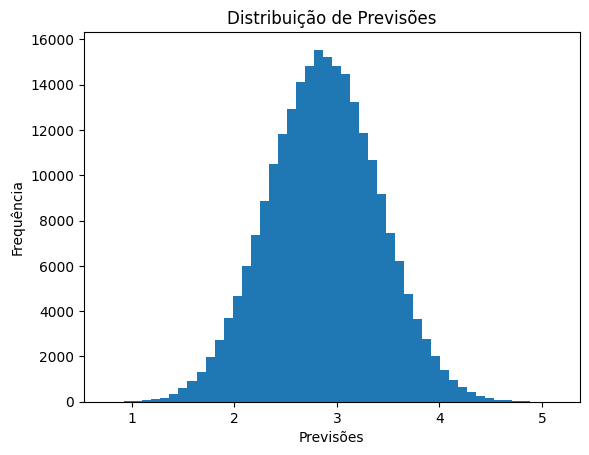

In [42]:
R_pred_test_selected_np = test_pred_nmf.cpu().detach().numpy()
plt.hist(R_pred_test_selected_np.flatten(), bins=50)
plt.xlabel('Previsões')
plt.ylabel('Frequência')
plt.title('Distribuição de Previsões')
plt.show()

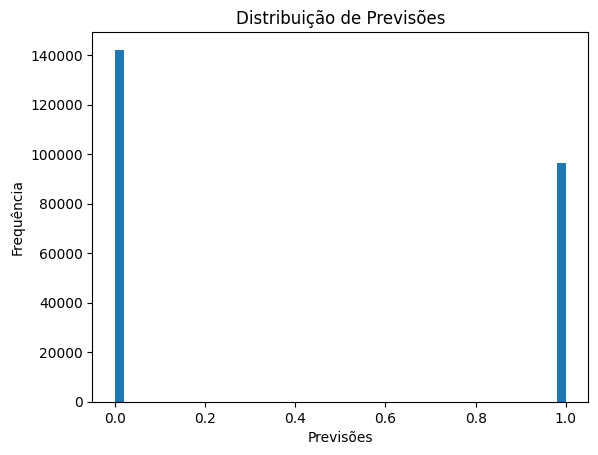

In [43]:
plt.hist(predicted_classes_nmf.flatten(), bins=50)
plt.xlabel('Previsões')
plt.ylabel('Frequência')
plt.title('Distribuição de Previsões')
plt.show()

# *SVD*


In [23]:
class SVDModel:
    def __init__(self, num_epochs, n_components, learning_rate):
        self.num_epochs = num_epochs
        self.n_components = n_components
        self.learning_rate = learning_rate
    
    def fit(self, train, val):
        num_users = train.shape[0]
        num_items = train.shape[1]

        # Inicializar matrizes de fatorização aleatórias
        self.U = torch.rand(num_users, self.n_components, requires_grad=True)
        self.S = torch.rand(self.n_components, requires_grad=True)
        self.V = torch.rand(self.n_components, num_items, requires_grad=True)

        loss_func = torch.nn.MSELoss()
        optimizer = torch.optim.SGD([self.U, self.S, self.V], lr=self.learning_rate, momentum=0.9)

        self.best_val_loss = float('inf')

        for epoch in tqdm(range(self.num_epochs), "Epoca SVD: "):
            # Forward pass
            R_pred = torch.matmul(torch.matmul(self.U, torch.diag(self.S)), self.V)

            R_pred_train = R_pred[:train.shape[0], :train.shape[1]]
            R_pred_val = R_pred[:val.shape[0], :val.shape[1]]

            train_loss = loss_func(R_pred_train, train)
            val_loss = loss_func(R_pred_val, val)

            # Backward pass and optimization
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.best_U = self.U.clone().detach()
                self.best_S = self.S.clone().detach()
                self.best_V = self.V.clone().detach()

    def predict(self, test):
        test_pred_svd = torch.mm(torch.mm(self.best_U, torch.diag(self.best_S)), self.best_V)
        test_pred_select_svd = test_pred_svd[:test.shape[0], :test.shape[1]]
        return test_pred_select_svd

In [24]:
svd_model = SVDModel(num_epochs, n_components, learning_rate)
svd_model.fit(train_tensor, val_tensor)

Epoca SVD: 100%|██████████| 10000/10000 [00:25<00:00, 399.26it/s]


In [25]:
test_pred_svd = svd_model.predict(test_tensor)
test_mse_svd = mean_squared_error(test_tensor, test_pred_svd.detach().numpy())

print(f'MSE for SVD on test set: {test_mse_svd}')

MSE for SVD on test set: 0.0904209166765213


In [33]:
threshold_value = 3
predicted_classes_svd = (test_pred_svd > threshold_value).float()
true_classes = (test_data > threshold_value).astype(float)

# Calculando métricas de avaliação
accuracy_svd = accuracy_score(true_classes.ravel(), predicted_classes_svd.ravel())
precision_svd = precision_score(true_classes.ravel(), predicted_classes_svd.ravel())
recall_svd = recall_score(true_classes.ravel(), predicted_classes_svd.ravel())
f1_svd = f1_score(true_classes.ravel(), predicted_classes_svd.ravel())

# Exibindo as métricas calculadas
print(f"Acurácia: {accuracy_svd}")
print(f"Precisão: {precision_svd}")
print(f"Recall: {recall_svd}")
print(f"F1-score: {f1_svd}")


Acurácia: 0.9001356533971965
Precisão: 0.8823251282345187
Recall: 0.9431341317732104
F1-score: 0.9117168068222196


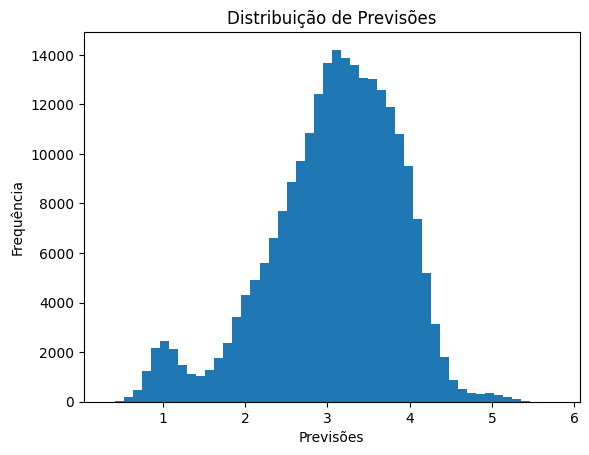

In [34]:
R_pred_test_selected_svd = test_pred_svd.cpu().detach().numpy()
plt.hist(R_pred_test_selected_svd.flatten(), bins=50)
plt.xlabel('Previsões')
plt.ylabel('Frequência')
plt.title('Distribuição de Previsões')
plt.show()

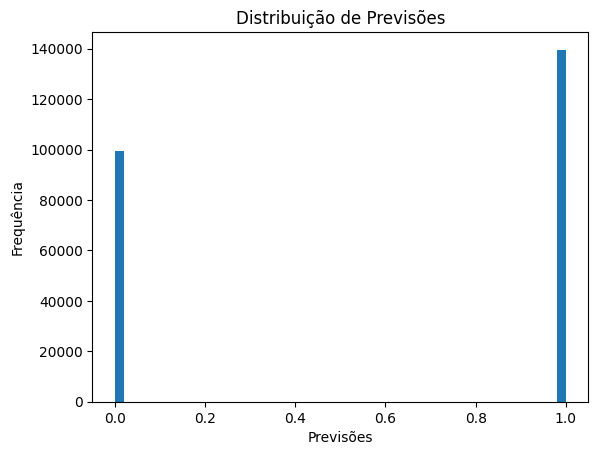

In [35]:
plt.hist(predicted_classes_svd.flatten(), bins=50)
plt.xlabel('Previsões')
plt.ylabel('Frequência')
plt.title('Distribuição de Previsões')
plt.show()